In [43]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation, sanity_check, plot_policy
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD

### Setting

In [44]:
# Parameters
n = 10
wind_intensity = 0.2 # between 0 and 1
gamma = 0.7

In [45]:
grid = np.zeros((n, n))
goal = [                    
        [i for  i in range(0,int(n/1.2))], 
        [n-1]
        ]
obstacles = [
                [i for  i in range(0,int(n/1.2))],
                [int(n/2)]
                
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n))/(n**2)

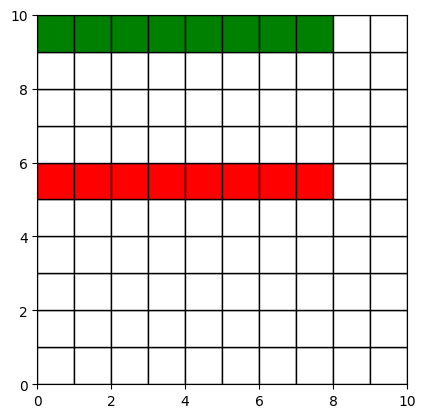

In [46]:
plot_gridworld(grid, obstacles, goal)

In [47]:
def transitions(s1, s , a, goal, n, wind_intensity): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 0
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 1
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = -1
    return r

In [48]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()

### Forward 

In [49]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Feb 24 10:30:46 AM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Feb 24 10:30:46 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 24 10:30:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 24 10:30:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 24 10:30:46 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 24 10:30:46 AM: Compiling problem (target solver=CLARABEL

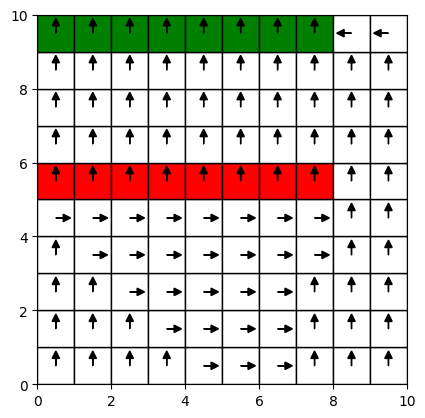

In [50]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

In [51]:
mu_expert = mu_e.value

In [52]:
mu_e.value

array([ 9.99999391e-03,  1.83999849e-02,  2.52599729e-02,  3.07479527e-02,
        1.17044733e-11,  1.00000000e-02,  1.84000000e-02,  2.52600000e-02,
        3.07480000e-02,  2.92248334e-02,  9.99996607e-03,  1.69999176e-02,
        2.18998458e-02,  8.35315153e-03,  1.02945478e-11,  1.00000000e-02,
        1.70000000e-02,  2.19000000e-02,  2.53300000e-02,  2.31091667e-02,
        9.99979983e-03,  1.69996867e-02,  9.11524893e-03,  9.30706062e-03,
        8.76226853e-12,  1.00000000e-02,  1.70000000e-02,  2.19000000e-02,
        2.53300000e-02,  2.31091667e-02,  9.99972707e-03,  7.61948052e-03,
        1.01727624e-02,  1.01368574e-02,  6.23371016e-12,  1.00000000e-02,
        1.70000000e-02,  2.19000000e-02,  2.53300000e-02,  2.31126182e-02,
        4.52629333e-03,  8.91574117e-03,  1.10684852e-02,  1.07700643e-02,
        3.71036671e-12,  1.00000000e-02,  1.70000000e-02,  2.19000000e-02,
        2.53595845e-02,  2.31791595e-02,  6.13449644e-03,  1.00695111e-02,
        1.20656019e-02,  

In [53]:
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert/np.sum(mu_expert)

In [54]:
mu_expert

array([2.99999817e-03, 5.51999547e-03, 7.57799187e-03, 9.22438582e-03,
       3.51134200e-12, 3.00000000e-03, 5.52000000e-03, 7.57800000e-03,
       9.22440001e-03, 8.76745000e-03, 2.99998982e-03, 5.09997528e-03,
       6.56995374e-03, 2.50594546e-03, 3.08836435e-12, 3.00000000e-03,
       5.10000000e-03, 6.57000000e-03, 7.59900001e-03, 6.93275000e-03,
       2.99993995e-03, 5.09990600e-03, 2.73457468e-03, 2.79211818e-03,
       2.62868056e-12, 3.00000000e-03, 5.10000000e-03, 6.57000000e-03,
       7.59900001e-03, 6.93275000e-03, 2.99991812e-03, 2.28584416e-03,
       3.05182871e-03, 3.04105723e-03, 1.87011305e-12, 3.00000000e-03,
       5.10000000e-03, 6.57000000e-03, 7.59900001e-03, 6.93378546e-03,
       1.35788800e-03, 2.67472235e-03, 3.32054555e-03, 3.23101929e-03,
       1.11311001e-12, 3.00000000e-03, 5.10000000e-03, 6.57000000e-03,
       7.60787534e-03, 6.95374786e-03, 1.84034893e-03, 3.02085333e-03,
       3.61968058e-03, 3.50425912e-03, 0.00000000e+00, 3.00000000e-03,
      

### SMD

In [55]:
def get_step_size(S, A, gamma, alpha, epsilon):
    v_cu = 32 * alpha * S * A + (16 * (1 - gamma)**2 - 8 * alpha * (1 - gamma)**2 + 2 * (1 + gamma**2) * (1 + (1 - alpha)**2)) / (1 - gamma)**2
    v_mu = S * A * (2 + 4*(1 + gamma**2) / (1 - gamma)**2)
    eta_cu = epsilon / (4 * v_cu)
    eta_mu = epsilon / (4 * v_mu)
    return eta_cu, eta_mu

In [56]:
c_hat = np.zeros(n**2 * len(actions))
for i in range(len(goal[0])):
    for j in range(len(goal[1])):
        for a in range(len(actions)):
            if np.random.uniform() < 0.5:
                s = gridworld.grid_to_S[goal[0][i], goal[1][j]]
                c_hat[gridworld.get_indexing(s, a)] = -1

for i in range(len(obstacles[0])):
    for j in range(len(obstacles[1])):
        for a in range(len(actions)):
            if np.random.uniform() < 0.5:
                s = gridworld.grid_to_S[obstacles[0][i], obstacles[1][j]]
                c_hat[gridworld.get_indexing(s, a)] = 1       

In [69]:
alpha = 0.1
mu_e = mu_expert
c_0 = np.zeros(n**2 * len(actions))
u_0 = np.zeros(n**2)
mu_0 = np.ones(n**2 * len(actions)) / (n**2 * len(actions))
step_size = get_step_size(n**2, len(actions), gamma, alpha, 0.1)
T = 100000

In [70]:
c_hat

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [71]:
step_size

(1.8448399416866596e-05, 9.161237785016291e-07)

In [72]:
solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(20, True)

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20


In [73]:
mu_e @ gridworld.mdp_forward.c, mu @ gridworld.mdp_forward.c, mu @ c

(np.float64(-0.24628489704018883),
 np.float64(0.06712764163474659),
 np.float64(0.012794170688601118))

In [74]:
c_true = np.zeros((n, n, len(actions)))
for i in range(len(gridworld.mdp_forward.c)):
    c_true[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = gridworld.mdp_forward.c[i]


UP


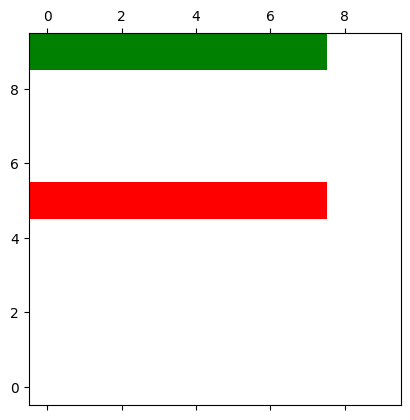

DOWN


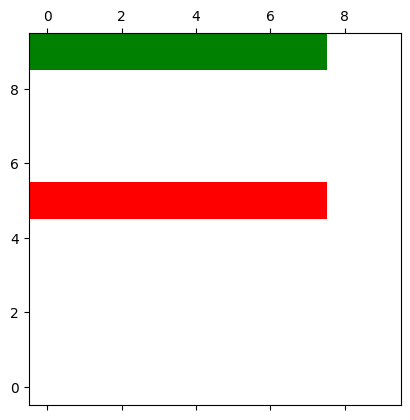

LEFT


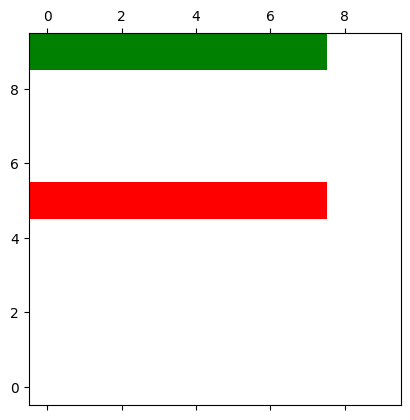

RIGHT


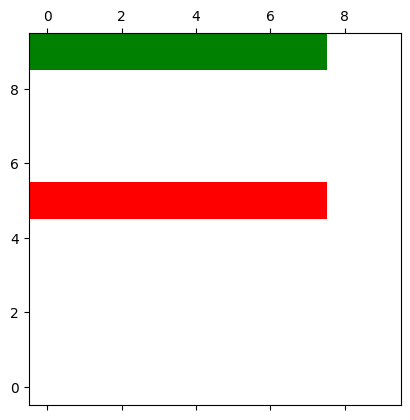

In [75]:
print("UP")
plot_cost_function(c_true[:, :, 0])
print("DOWN")
plot_cost_function(c_true[:, :, 1])
print("LEFT")
plot_cost_function(c_true[:, :, 2])
print("RIGHT")
plot_cost_function(c_true[:, :, 3])

In [76]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c[i]

UP


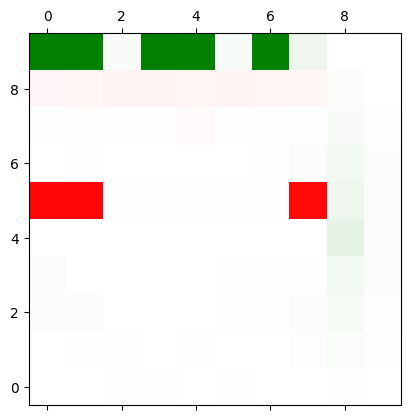

DOWN


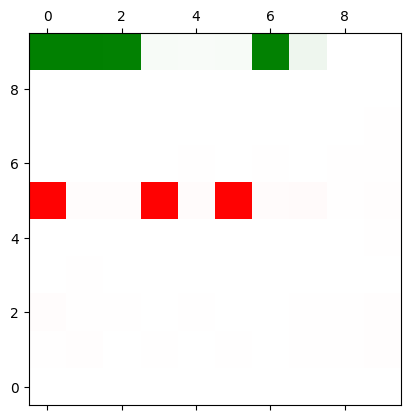

LEFT


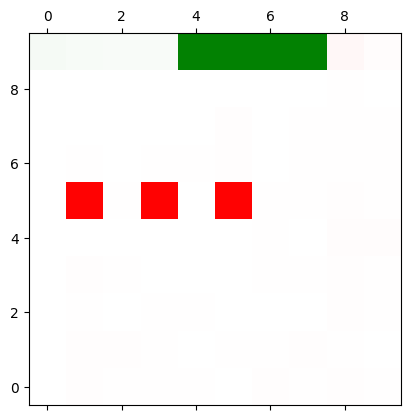

RIGHT


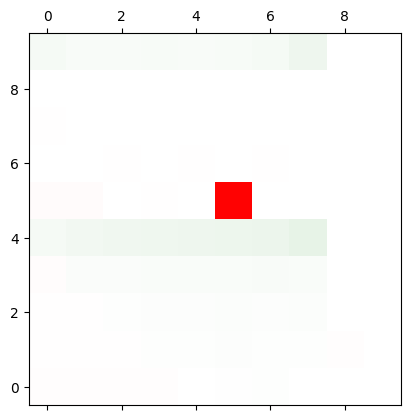

In [77]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

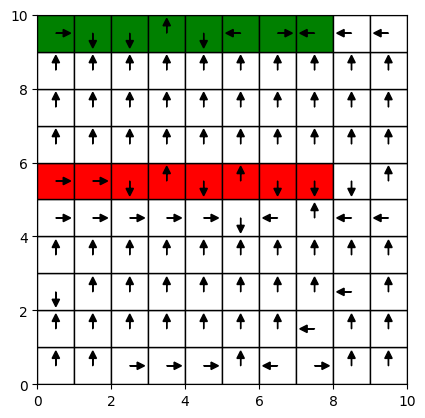

In [78]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

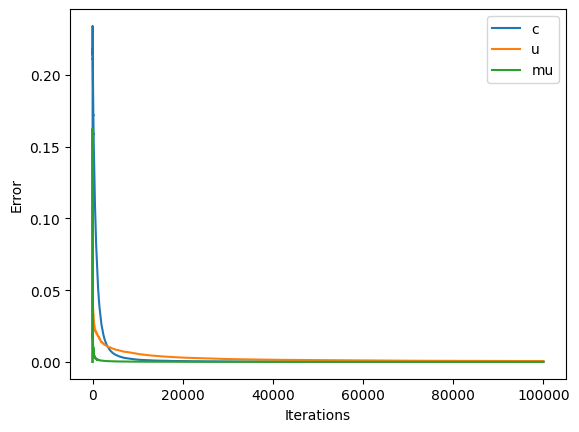

In [79]:
# plot the following list against its axis
import matplotlib.pyplot as plt
plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
#add labels
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()


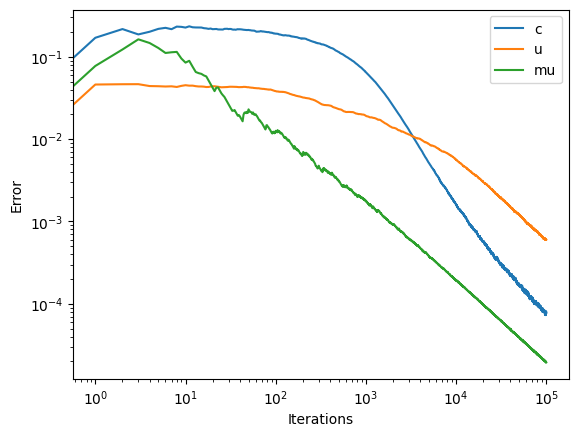

In [80]:
plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.xscale('log')
plt.yscale('log')
#add labels
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()